In [1]:
# # stacking chirps data
# # This script processes CHIRPS rainfall data, clips it to a specified region of interest (ROI), and stacks the data across multiple years.
# # It uses xarray for handling NetCDF files, geopandas for geospatial operations, and rioxarray for raster data processing.
# import os
# import xarray as xr
# import geopandas as gpd
# import rioxarray

# # Define paths
# data_dir = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 CHIRPS"
# roi_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\ROI\ROI_v2.gpkg"
# output_clipped_dir = os.path.join(data_dir, "clipped")
# output_stacked_dir = os.path.join(data_dir, "stacked")
# os.makedirs(output_clipped_dir, exist_ok=True)
# os.makedirs(output_stacked_dir, exist_ok=True)

# # Load ROI
# roi = gpd.read_file(roi_path)
# roi = roi.to_crs("EPSG:4326")  # Make sure it's in the same CRS as the data

# # List of years
# years = [str(y) for y in range(2007, 2022)]

# # Clip and save each file
# clipped_datasets = []
# for year in years:
#     nc_path = os.path.join(data_dir, f"CHIRPS_rainfall_{year}.nc")
#     print(f"Processing {nc_path}...")
#     ds = xr.open_dataset(nc_path)
#     ds = ds.rio.write_crs("EPSG:4326")  # Ensure CRS is defined
#     clipped = ds.rio.clip(roi.geometry.values, roi.crs)
    
#     clipped_path = os.path.join(output_clipped_dir, f"clipped_CHIRPS_rainfall_{year}.nc")
#     clipped.to_netcdf(clipped_path)
#     clipped_datasets.append(clipped)

# # Stack all clipped datasets along the time dimension
# stacked = xr.concat(clipped_datasets, dim="time")

# # Save stacked dataset
# stacked_path = os.path.join(output_stacked_dir, "stacked_CHIRPS_rainfall_2007_2021.nc")
# stacked.to_netcdf(stacked_path)

# print("✅ Done! Stacked file saved at:", stacked_path)


In [2]:
# # unzipping ERA5 data
# # This script unzips and renames ERA5 data files from a specified directory.
# # It uses the zipfile module to handle the extraction and glob to find all relevant files.


# import zipfile
# import os
# import glob

# # Folder where the .nc (zip) files are stored
# zip_folder = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\zipped"

# # Folder where all unzipped and renamed .nc files will go
# extract_dir = os.path.join(zip_folder, "unzipped_all")
# os.makedirs(extract_dir, exist_ok=True)

# # Find all .nc files (which are actually zipped)
# zip_files = glob.glob(os.path.join(zip_folder, "*.nc"))

# for zip_path in zip_files:
#     zip_name = os.path.basename(zip_path)
#     base_name = os.path.splitext(zip_name)[0]  # e.g., "ERA5_Nakuru_2007_2"
    
#     # Extract the year and tag from the file name
#     tag = base_name.replace("ERA5_Nakuru_", "")  # e.g., "2007_2"

#     try:
#         with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#             for file_info in zip_ref.infolist():
#                 original_name = os.path.basename(file_info.filename)
#                 if not original_name:
#                     continue  # skip directories

#                 # Construct new file name: e.g., "ERA5_2007_2_temperature.nc"
#                 new_name = f"ERA5_{tag}_{original_name}"
#                 new_path = os.path.join(extract_dir, new_name)

#                 # Extract and rename
#                 with zip_ref.open(file_info) as source, open(new_path, "wb") as target:
#                     target.write(source.read())
                
#                 print(f"✅ Extracted & renamed: {new_name}")
    
#     except zipfile.BadZipFile:
#         print(f"❌ Skipped (not a zip file): {zip_name}")

# print(f"\n📁 All renamed .nc files saved in: {extract_dir}")



In [3]:
# import xarray as xr


# instant = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\zipped\unzipped_all\ERA5_2007_2_data_stream-oper_stepType-instant.nc")
# display(instant)


# accum = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\zipped\unzipped_all\ERA5_2007_2_data_stream-oper_stepType-accum.nc")
# display(accum)



In [4]:
# # CONCATENATE ERA5 DATA


# # -*- coding: utf-8 -*-
# """
# Created on Wed 26 Jul 16:31 2022

# @author: WITD5
# @checked: 
    
# Projectcode: 130785
    
# description
# """

# #%% documentation

# """
# Explanation of the script: 
# This script concatenates different ERA5 netcdf files

# """

# #%% import packages
# # Import builtin modules
# import os
# import glob

# # Import required modules


# # Import custom modules
# import setup_wflow as swf


# #%% import directories and files

# main_dir = r'C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\zipped\unzipped_all'
# input_dir = os.path.join(main_dir)
# output_dir = os.path.join(main_dir)


# #%% code: run function and save results

# # Get all nc files
# list_files = glob.glob(os.path.join(input_dir, '*_2007_2021_*.nc'))

# # Concat the files
# ERA5_tot = swf.concat_ERA5(list_files)

# # Export concatenated ERA5 file
# ERA5_tot.to_netcdf(os.path.join(output_dir, 'ERA5_Nakuru_2007_2021_all_vars.nc'))




In [5]:
# # temporally resample ERA5 data

# # -*- coding: utf-8 -*-
# """
# Created on Thu 22 Jul 08:53 2022

# @author: WITD5
# @checked: 
    
# description
# """

# #%% documentation

# """
# Explanation of the script: 
# This script resamples an ERA5 netcdf file temporally!

# """

# #%% import packages
# # Import builtin modules
# import os

# # Import required modules


# # Import custom modules
# import setup_wflow as swf


# #%% import directories and files

# main_dir = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\zipped\unzipped_all"
# input_dir = os.path.join(main_dir)
# output_dir = os.path.join(main_dir)


# #%% run function and save results

# # Read concatenated ERA5 file
# ERA5_path = os.path.join(input_dir, 'combined_dataset_new.nc')

# # Resample the data
# ERA5_res = swf.resample_ERA5_temporally(ERA5_path, output_freq='1D')

# # Export resampled ERA5 file
# ERA5_res.to_netcdf(os.path.join(output_dir, 'combined_dataset_new_daily.nc'))

In [6]:
# import xarray as xr 

# all_vars = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\ERA5_Nakuru_2007_2021_all_vars.nc")
# display(all_vars)

# # all_vars.tp.mean(axis=(0,1)).plot()


# # all_vars['tp'] = all_vars['tp'].sum(dim="time")  # or .sum(dim="time") for variables like precipitation
# # all_vars['pev'] = all_vars['pev'].sum(dim="time")  # or .sum(dim="time") for variables like evaporation
# # all_vars['t2m'] = all_vars['t2m'].mean(dim="time")  # or .mean(dim="time") for variables like temperature
# # all_vars['ssrd'] = all_vars['ssrd'].sum(dim="time")  # or .mean(dim="time") for variables like solar radiation
# # all_vars['tisr'] = all_vars['tisr'].sum(dim="time")  # or .mean(dim="time") for variables like solar radiation
# # all_vars['msl'] = all_vars['msl'].mean(dim="time")  # or .mean(dim="time") for variables like pressure

# # Rename valid_time to time
# #all_vars_clean = all_vars.rename({"valid_time": "time"})
# # Save the cleaned dataset
# #all_vars_clean.to_netcdf(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\ERA5_Nakuru_2007_2021_clean_timedim.nc")
# #print(all_vars.t2m)

In [7]:
# import xarray as xr 

# ds = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\ERA5_Nakuru_d_2007_2021.nc")
# display(ds)
# ds.tp.mean(axis=(0,1)).plot()

In [8]:
# import xarray as xr

# ds_daily = ds.mean(dim="time")  # or .sum(dim="time") for variables like precipitation

# # Rename valid_time to time
# ds_daily = ds_daily.rename({"valid_time": "time"})
# # Save the cleaned dataset
# ds_daily.to_netcdf(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\ERA5_Nakuru_d_2007_2021_clean_timedim.nc")
# print(ds_daily.t2m)

In [9]:
# clean = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\ERA5_Nakuru_d_2007_2021_clean_timedim.nc")
# display(clean)

# #print(clean.t2m)

In [10]:
# import numpy as np
# import xarray as xr

# default = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\wflow_Nakuru_res0.002dg_gauges_lake\inmaps_era5_era5_debruin_86400_2000_2000.nc")
# display(default)

# #default.temp[200, :, :].plot()
# #default.temp.mean(axis=(1,2)).plot()
# #default.precip.mean(axis=(1,2)).plot()

# print(default.pet)

# var = default['pet']
# num_nans = np.isnan(var).sum().item()
# print(f"Number of NaN values: {num_nans}")

In [11]:
#default.precip.plot()
#default.temp.plot()

In [12]:
# era5_sim = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_curstate_era5_rivarea_gauges\inmaps_era5_Nakuru_86400_2007_2021.nc")
# display(era5_sim)

In [13]:
# #era5_sim.temp[200, :, :].plot()

# var1 = era5_sim['temp']
# num_nans1 = np.isnan(var1).sum().item()
# print(f"Number of NaN values: {num_nans1}")

In [14]:
# #era5_sim.temp.mean(axis=(1,2)).plot()
# era5_sim.precip.mean(axis=(1,2)).plot()

# #print(len(era5_sim.time))

# #era5_sim.temp.plot()

# print(era5_sim.pet)

In [15]:
# print(len(era5_sim.temp))
# print(len(era5_sim.pet))

In [16]:
# print(era5_sim.temp.values)
# print(era5_sim.temp)

In [17]:
# import xarray as xr



# test = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\zipped\unzipped_all\combined_dataset_new_daily.nc")


# # # Rename valid_time to time
# test = test.rename({"valid_time": "time"})
# # # Save the cleaned dataset
# test.to_netcdf(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\combined_dataset_new_daily_time.nc")
# display(test)

In [18]:
# # Controleer op NaNs
# missing = test['t2m'].isnull().sum()
# print("Aantal ontbrekende waarden:", missing.values)

In [19]:
# import pandas as pd
# import numpy as np

# # Maak maskers aan voor NaN-waarden per variabele
# mask_tp_nan = test['tp'].isnull()
# mask_pev_nan = test['pev'].isnull()
# mask_t2m_nan = test['t2m'].isnull()

# # Bepaal waar t2m ontbreekt, maar tp en pev wél aanwezig zijn
# mask_inconsistent = mask_t2m_nan & ~mask_tp_nan & ~mask_pev_nan

# # Tel het aantal inconsistenties over ruimte (per tijdstap)
# inconsistent_over_time = mask_inconsistent.sum(dim=["latitude", "longitude"])

# # Vind de tijdstippen waarop inconsistenties voorkomen
# times_with_inconsistencies = test.time[inconsistent_over_time > 0]

# # Bekijk enkele voorbeelden
# inconsistent_summary = pd.DataFrame({
#     "time": times_with_inconsistencies.values,
#     "n_inconsistent_cells": inconsistent_over_time.sel(time=times_with_inconsistencies).values
# })

# inconsistent_summary.head(10)

# # Tel het aantal inconsistenties over de tijd (per locatie)
# inconsistent_over_space = mask_inconsistent.sum(dim="time")

# # Vind de locaties met minimaal één inconsistente waarde
# lat, lon = test.latitude, test.longitude
# lat_grid, lon_grid = np.meshgrid(lat, lon, indexing="ij")
# inconsistent_locs = inconsistent_over_space > 0

# # Haal de coördinaten op van de cellen waar inconsistenties zijn
# inconsistent_coords = list(zip(
#     lat_grid[inconsistent_locs],
#     lon_grid[inconsistent_locs]
# ))

# # Bekijk de eerste 10
# print(inconsistent_coords[:10])

In [20]:
#test.t2m.plot()

In [21]:
import xarray as xr

test_run = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete_chirps\inmaps_chirps_Nakuru_86400_2007_2021.nc")

display(test_run)

<xarray.Dataset> Size: 5GB
Dimensions:      (time: 5479, longitude: 233, latitude: 321)
Coordinates:
  * time         (time) datetime64[ns] 44kB 2007-01-01 2007-01-02 ... 2021-12-31
  * longitude    (longitude) float64 2kB 35.84 35.84 35.84 ... 36.22 36.22 36.22
  * latitude     (latitude) float64 3kB -0.1821 -0.1838 ... -0.7138 -0.7154
    spatial_ref  int32 4B ...
Data variables:
    precip       (time, latitude, longitude) float32 2GB ...
    pet          (time, latitude, longitude) float32 2GB ...
    temp         (time, latitude, longitude) float32 2GB ...
Attributes:
    standard_name:  precipitation
    units:          mm
    _FillValue:     nan
    unit:           mm
    precip_fn:      chirps_global

In [22]:
# # Controleer op NaNs
# missing = test_run['pet'].isnull().sum()
# print("Aantal ontbrekende waarden:", missing.values)

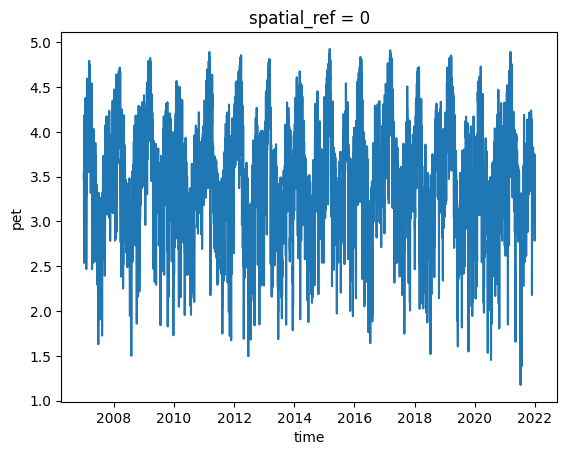

In [23]:
test_run.pet.mean(axis=(1,2)).plot()

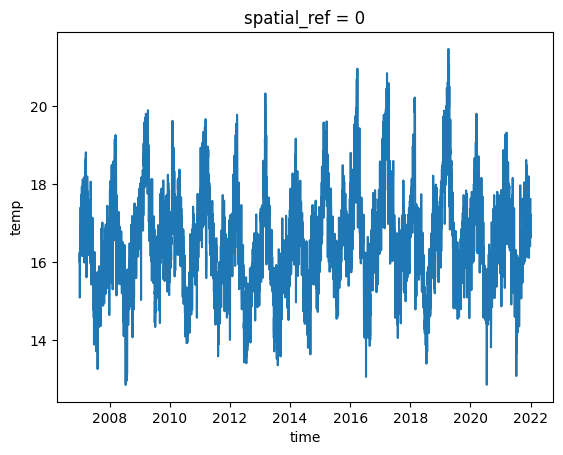

In [24]:
test_run.temp.mean(axis=(1,2)).plot()

(array([2.19455562e+08, 1.16201620e+07, 2.76459500e+06, 7.71583000e+05,
        1.92228000e+05, 5.51470000e+04, 2.06610000e+04, 8.14100000e+03,
        1.91800000e+03, 1.16500000e+03]),
 array([  0.        ,  16.66199875,  33.3239975 ,  49.98599625,
         66.647995  ,  83.30999756,  99.97199249, 116.63398743,
        133.29598999, 149.95799255, 166.61999512]),
 <BarContainer object of 10 artists>)

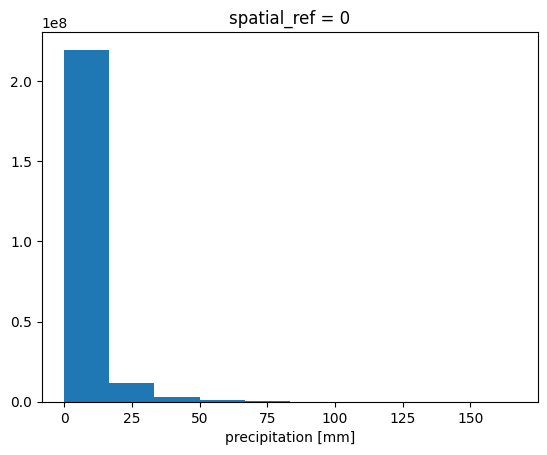

In [25]:
test_run.precip[:, :, :].plot()

In [26]:
import pandas as pd
import numpy as np

# Maak maskers aan voor NaN-waarden per variabele
mask_tp_nan = test_run['precip'].isnull()
mask_pev_nan = test_run['pet'].isnull()
mask_t2m_nan = test_run['temp'].isnull()

# Bepaal waar t2m ontbreekt, maar tp en pev wél aanwezig zijn
mask_inconsistent = mask_t2m_nan & ~mask_tp_nan & ~mask_pev_nan

# Tel het aantal inconsistenties over ruimte (per tijdstap)
inconsistent_over_time = mask_inconsistent.sum(dim=["latitude", "longitude"])

# Vind de tijdstippen waarop inconsistenties voorkomen
times_with_inconsistencies = test_run.time[inconsistent_over_time > 0]

# Bekijk enkele voorbeelden
inconsistent_summary = pd.DataFrame({
    "time": times_with_inconsistencies.values,
    "n_inconsistent_cells": inconsistent_over_time.sel(time=times_with_inconsistencies).values
})

inconsistent_summary.head(10)

# Tel het aantal inconsistenties over de tijd (per locatie)
inconsistent_over_space = mask_inconsistent.sum(dim="time")

# Vind de locaties met minimaal één inconsistente waarde
lat, lon = test_run.latitude, test_run.longitude
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing="ij")
inconsistent_locs = inconsistent_over_space > 0

# Haal de coördinaten op van de cellen waar inconsistenties zijn
inconsistent_coords = list(zip(
    lat_grid[inconsistent_locs],
    lon_grid[inconsistent_locs]
))

# Bekijk de eerste 10
print(inconsistent_coords)

[(np.float64(-0.18375000033333333), np.float64(36.214583333)), (np.float64(-0.18541666699999998), np.float64(36.214583333)), (np.float64(-0.18541666699999998), np.float64(36.216249999666665)), (np.float64(-0.18708333366666666), np.float64(36.214583333)), (np.float64(-0.18708333366666666), np.float64(36.216249999666665)), (np.float64(-0.18708333366666666), np.float64(36.21791666633333)), (np.float64(-0.18875000033333333), np.float64(36.214583333)), (np.float64(-0.18875000033333333), np.float64(36.216249999666665)), (np.float64(-0.18875000033333333), np.float64(36.21791666633333)), (np.float64(-0.18875000033333333), np.float64(36.219583333)), (np.float64(-0.19041666699999998), np.float64(36.214583333)), (np.float64(-0.19041666699999998), np.float64(36.216249999666665)), (np.float64(-0.19041666699999998), np.float64(36.21791666633333)), (np.float64(-0.19041666699999998), np.float64(36.219583333)), (np.float64(-0.19208333366666666), np.float64(36.214583333)), (np.float64(-0.192083333666666

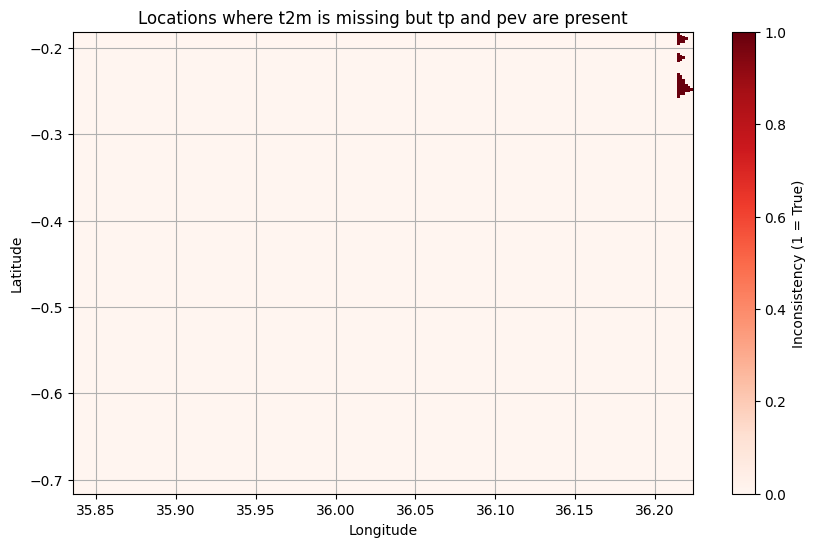

In [27]:
import matplotlib.pyplot as plt

# Maak een masker met 1's op locaties waar inconsistente data is
inconsistent_map = mask_inconsistent.sum(dim="time") > 0

plt.figure(figsize=(10, 6))
plt.pcolormesh(test_run.longitude, test_run.latitude, inconsistent_map, shading='auto', cmap='Reds')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Locations where t2m is missing but tp and pev are present")
plt.colorbar(label="Inconsistency (1 = True)")
plt.grid(True)
plt.show()


In [28]:
import xarray as xr
import numpy as np
from scipy.spatial import cKDTree


# Get coordinate info
lat = test_run.latitude.values
lon = test_run.longitude.values
time = test_run.time.values

# Create 2D mesh of lat/lon
lon2d, lat2d = np.meshgrid(lon, lat)

# Stack spatial coordinates for fast lookup
all_points = np.column_stack([lat2d.ravel(), lon2d.ravel()])
tree = cKDTree(all_points)

# Create a copy of t2m to modify
t2m_filled = test_run.temp.copy()

# Iterate over time
for i, t in enumerate(time):
    t2m_slice = test_run.temp[i, :, :].values
    tp_slice = test_run.precip[i, :, :].values
    pev_slice = test_run.pet[i, :, :].values

    # Mask: missing t2m, but valid tp and pev
    mask = np.isnan(t2m_slice) & (~np.isnan(tp_slice)) & (~np.isnan(pev_slice))

    # Locations where t2m is available
    available_mask = ~np.isnan(t2m_slice)
    available_points = all_points[available_mask.ravel()]
    available_values = t2m_slice[available_mask]

    if available_points.size == 0:
        continue  # skip if no valid t2m data to use

    # Interpolate missing values
    missing_points = all_points[mask.ravel()]
    dists, idxs = tree.query(missing_points, k=1, distance_upper_bound=np.inf)
    filled_values = available_values[idxs]

    # Fill in the values
    t2m_slice[mask] = filled_values
    t2m_filled[i, :, :] = t2m_slice

# Save updated dataset
test_run['temp'] = t2m_filled



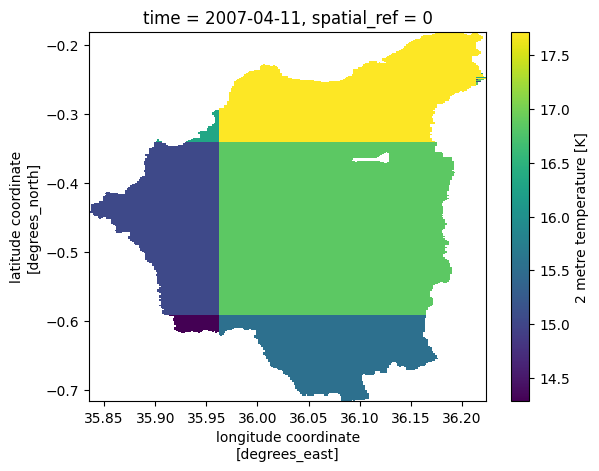

In [29]:
test_run.temp[100, :, :].plot()

In [32]:
test_run.to_netcdf(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\inmaps_chirps_Nakuru_86400_2007_2021_tempfill.nc")